In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [3]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [4]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

In [5]:
@tf.function
def hypothesis(x):
  return W*x + b

In [6]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [7]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

In [8]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

In [9]:
optimizer = tf.optimizers.SGD(0.01)

In [10]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [11]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [12]:
#케라스로 선형 회귀
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [13]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 1s 1ms/step - loss: 421.6050 - mse: 421.6050
Epoch 2/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9629 - mse: 1.9629
Epoch 3/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9534 - mse: 1.9534
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9443 - mse: 1.9443
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9356 - mse: 1.9356
Epoch 6/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9272 - mse: 1.9272
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9191 - mse: 1.9191
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 1.9113 - mse: 1.9113
Epoch 9/300
9/9 [==============================] - ETA: 0s - loss: 3.1064 - mse: 3.106 - 0s 1ms/step - loss: 1.9038 - mse: 1.9038
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 1.8965 - mse: 1.8965
Epoch 11/300
9/9 [===================

9/9 [==============================] - 0s 1ms/step - loss: 1.7123 - mse: 1.7123
Epoch 89/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7119 - mse: 1.7119
Epoch 90/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7114 - mse: 1.7114
Epoch 91/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7110 - mse: 1.7110
Epoch 92/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7106 - mse: 1.7106
Epoch 93/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7102 - mse: 1.7102
Epoch 94/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7098 - mse: 1.7098
Epoch 95/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7095 - mse: 1.7095
Epoch 96/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7091 - mse: 1.7091
Epoch 97/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7088 - mse: 1.7088
Epoch 98/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7084 - ms

9/9 [==============================] - 0s 1ms/step - loss: 1.6995 - mse: 1.6995
Epoch 176/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6995 - mse: 1.6995
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6994 - mse: 1.6994
Epoch 178/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6994 - mse: 1.6994
Epoch 179/300
9/9 [==============================] - 0s 997us/step - loss: 1.6994 - mse: 1.6994
Epoch 180/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6994 - mse: 1.6994
Epoch 181/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6993 - mse: 1.6993
Epoch 182/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6993 - mse: 1.6993
Epoch 183/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6993 - mse: 1.6993
Epoch 184/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6993 - mse: 1.6993
Epoch 185/300
9/9 [==============================] - 0s 1ms/step - loss:

9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 263/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 264/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 265/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 266/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 267/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 268/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 269/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 270/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 271/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 272/300
9/9 [==============================] - 0s 1ms/step - loss: 1

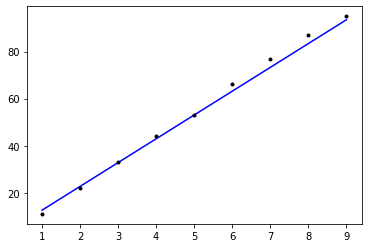

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [15]:
print(model.predict([9.5]))

[[98.55646]]
